In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os 
import pandas as pd
from PIL import Image
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,Input,ZeroPadding2D,BatchNormalization,Activation
from tensorflow.keras.metrics import BinaryAccuracy, Precision, Recall
from tensorflow.keras.layers.experimental import preprocessing


from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [5]:
folder_path = "D:/dl/brain_tumor_dataset"
No_Tumor_Img = os.listdir(folder_path + '/no/')
Tumor_Img = os.listdir(folder_path + '/yes/')

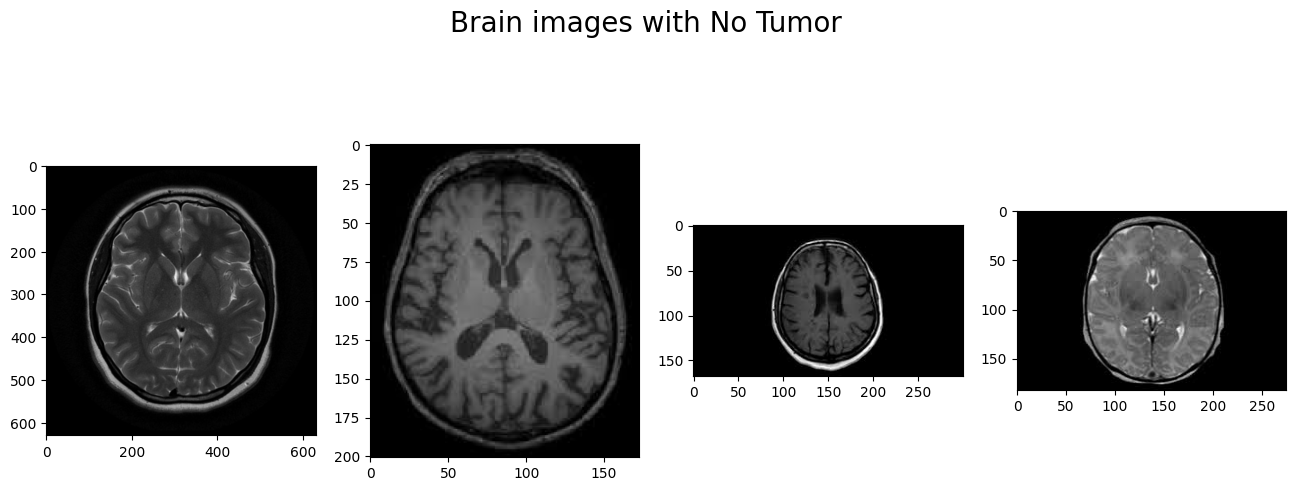

In [6]:
fig = plt.figure(figsize=(16,6))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('D:/dl/brain_tumor_dataset/no/'+ No_Tumor_Img[i])
    plt.imshow(img)
plt.suptitle("Brain images with No Tumor",fontsize=20)
plt.show()

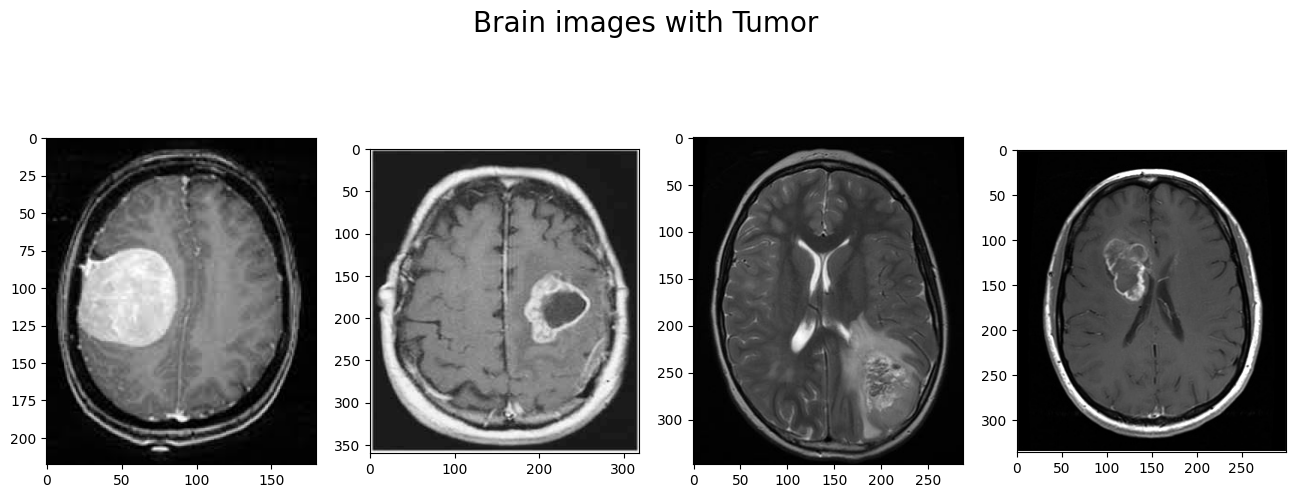

In [56]:
fig = plt.figure(figsize=(16,6))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('D:/dl/brain_tumor_dataset/yes/'+ Tumor_Img[i])
    plt.imshow(img)
plt.suptitle("Brain images with Tumor",fontsize=20)
plt.show()

In [7]:
Classes = {'no':0, 'yes':1}

In [8]:
X = []
y = []
for i in Classes:
    path = 'D:/dl/brain_tumor_dataset/'+i
    for j in os.listdir(path):
        img = cv2.imread(path+'/'+j, 0)
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # use the process function to crop the brain and ignore the unnecessary rest part of the image
        
        # resize image
        img = cv2.resize(img, (240,240),interpolation=cv2.INTER_CUBIC)
        # normalize values
        img = img / 255  #-->Apply normalization because we want pixel values to be scaled to the range 0-1
        X.append(img)
        y.append(Classes[i])

In [9]:
X = np.array(X)
y = np.array(y)

X.shape, y.shape

((253, 240, 240), (253,))

In [10]:
Class_series=pd.Series(y)
lis=["No Tumor","Tumor"]
Tumor_or_not = Class_series.value_counts().tolist()
values = [Tumor_or_not[0], Tumor_or_not[1]]
fig = px.pie(values=Class_series.value_counts(), names=lis , width=800, height=400, color_discrete_sequence=["skyblue","black"]
             ,title="percentage between Tumor & No Tumor")
fig.show()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=32)

In [12]:
X_train.shape

(202, 240, 240)

In [13]:
X_train = X_train.reshape(-1, 240, 240, 1)
X_test = X_test.reshape(-1, 240, 240, 1)


In [14]:
X_train.shape

(202, 240, 240, 1)

In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=64,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(240,240,1)),
    tf.keras.layers.Conv2D(32,(4,4),activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2),
                              padding='valid'),
    tf.keras.layers.Conv2D(32,(4,4),activation='relu'),
    tf.keras.layers.Conv2D(16,3,activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 238, 238, 64)      640       
                                                                 
 conv2d_1 (Conv2D)           (None, 235, 235, 32)      32800     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 117, 117, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 114, 114, 32)      16416     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 16)      4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 16)       0         
 2D)                                                    

In [16]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
history = model.fit(x=X_train, y=y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
7/7 [==============================] - 76s 10s/step - loss: 0.6282 - accuracy: 0.6881 - val_loss: 0.5429 - val_accuracy: 0.7843
Epoch 2/10
7/7 [==============================] - 67s 9s/step - loss: 0.5650 - accuracy: 0.7525 - val_loss: 0.4778 - val_accuracy: 0.7451
Epoch 3/10
7/7 [==============================] - 67s 9s/step - loss: 0.4740 - accuracy: 0.7970 - val_loss: 0.4927 - val_accuracy: 0.7843
Epoch 4/10
7/7 [==============================] - 67s 9s/step - loss: 0.4296 - accuracy: 0.8218 - val_loss: 0.4942 - val_accuracy: 0.7843
Epoch 5/10
7/7 [==============================] - 66s 9s/step - loss: 0.3450 - accuracy: 0.8564 - val_loss: 0.6009 - val_accuracy: 0.8039
Epoch 6/10
7/7 [==============================] - 68s 10s/step - loss: 0.2497 - accuracy: 0.8911 - val_loss: 0.6437 - val_accuracy: 0.7451
Epoch 7/10
7/7 [==============================] - 67s 9s/step - loss: 0.1525 - accuracy: 0.9505 - val_loss: 1.0393 - val_accuracy: 0.7843
Epoch 8/10
7/7 [================

In [18]:
history = model.history.history
model_loss=pd.DataFrame(model.history.history)

In [19]:
def plot_metrics(history):
    
    train_loss = history['loss']
    val_loss = history['val_loss']
    train_acc = history['accuracy']
    val_acc = history['val_accuracy']
    
    # Loss
    plt.figure()
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    plt.show()
    
    # Accuracy
    plt.figure()
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.show()

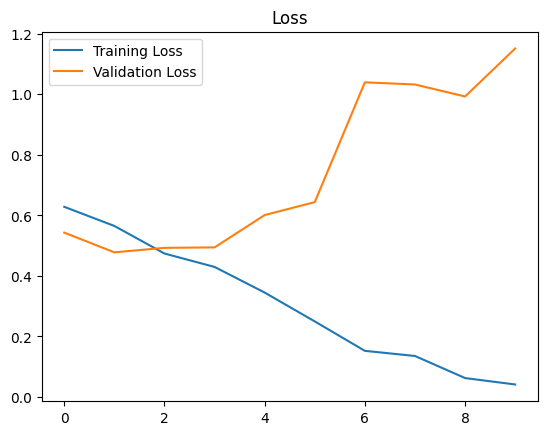

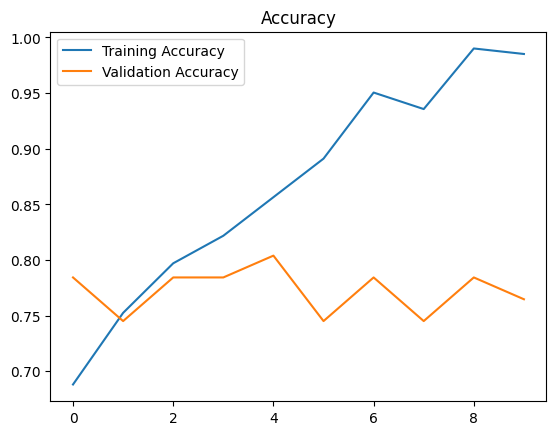

In [20]:
plot_metrics(history)

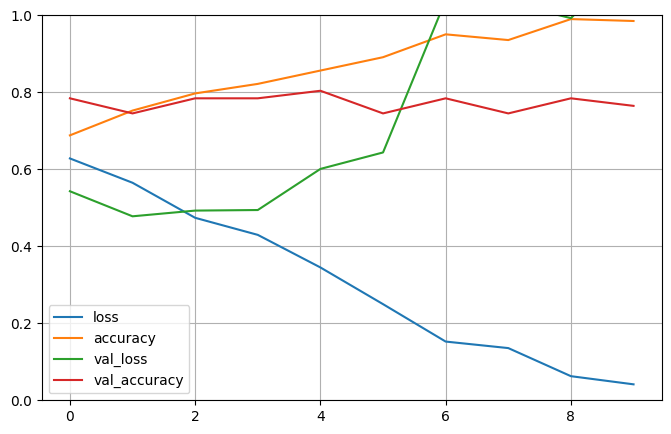

In [21]:
model_loss.plot (figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [22]:
X = X.reshape(-1, 240, 240, 1)

In [23]:
Model_evaluation = model.evaluate(X, y)
print(f"Loss: {Model_evaluation[0]*100:.2f} %\nAccuracy: {Model_evaluation[1]:.2f} %")

8/8 [==============================] - 12s 1s/step - loss: 0.2399 - accuracy: 0.9526
Loss: 23.99 %
Accuracy: 0.95 %


In [39]:
y_predicted_tf =model.predict(X_test).reshape(-1)
y_predicted_tf

2/2 [==============================] - 3s 874ms/step


array([8.4218258e-01, 5.0909007e-03, 4.8167050e-02, 9.9999875e-01,
       9.8877490e-01, 9.8723155e-01, 3.2137653e-01, 6.6343778e-01,
       2.1827510e-01, 2.2108367e-01, 2.7502212e-01, 2.8873667e-01,
       9.9997425e-01, 9.9981117e-01, 1.9657031e-02, 1.0069024e-05,
       3.0427229e-01, 9.9955732e-01, 9.9999577e-01, 9.9998933e-01,
       6.9942728e-02, 9.2723309e-07, 1.8885056e-03, 9.8834068e-01,
       9.9998719e-01, 9.9585366e-01, 9.9981862e-01, 9.9957061e-01,
       9.9999923e-01, 9.9999458e-01, 9.8659086e-01, 9.9800462e-01,
       9.9999577e-01, 9.9999982e-01, 9.9896848e-01, 9.9999982e-01,
       9.9987125e-01, 9.9986553e-01, 1.5126557e-02, 9.9998719e-01,
       1.3362079e-04, 9.9937373e-01, 9.9526757e-01, 1.0000000e+00,
       9.9993366e-01, 1.7430156e-02, 9.9811482e-01, 1.5712988e-04,
       9.9850738e-01, 9.7590941e-01, 8.4898895e-01], dtype=float32)

In [48]:
y_predicted_tf = [1 if y>=0.5 else 0 for y in y_predicted_tf] 
# y_predicted_tf

In [52]:
df = pd.DataFrame({"y_test": y_test , "Y_predicted" : y_predicted_tf})
df.head(8)

y_test  Y_predicted
0       0            1
1       0            0
2       0            0
3       0            1
4       1            1
5       1            1
6       1            0
7       1            1

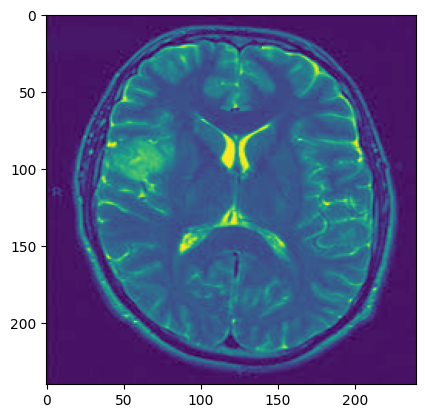

Predicted Value is: no Tumor 


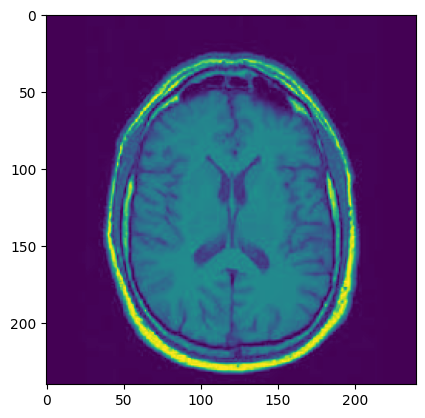

Predicted Value is: no Tumor 


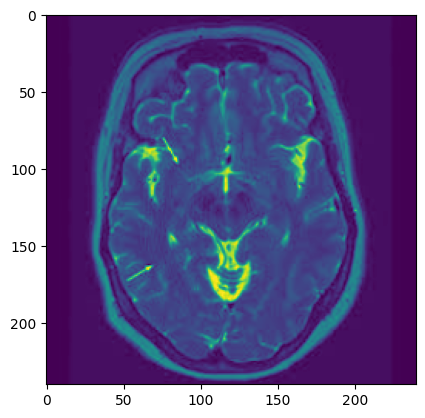

Predicted Value is: tumor 


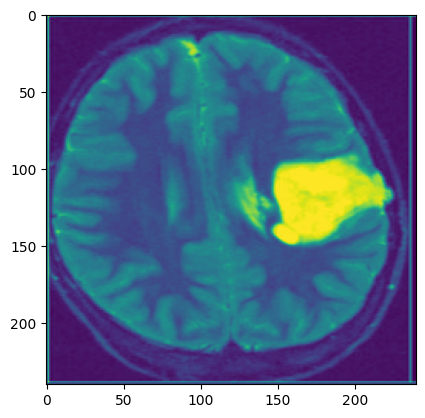

Predicted Value is: tumor 


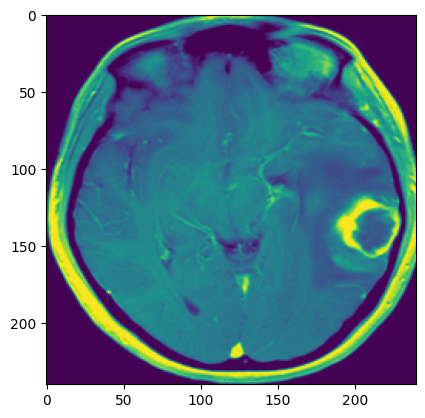

Predicted Value is: tumor 


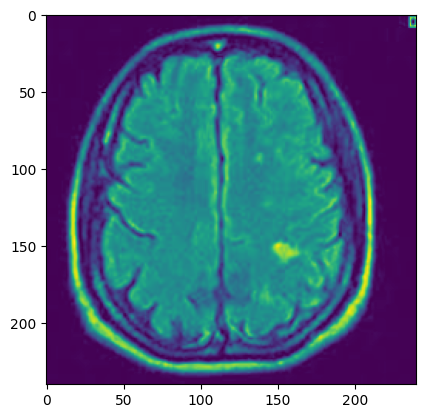

Predicted Value is: tumor 


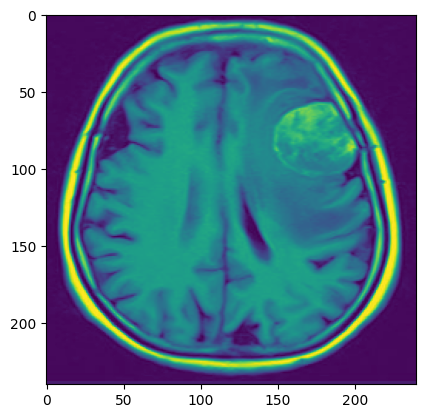

Predicted Value is: tumor 


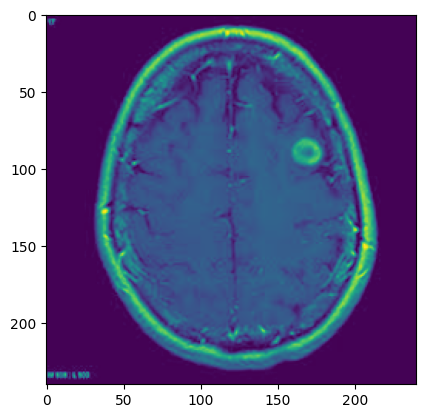

Predicted Value is: tumor 


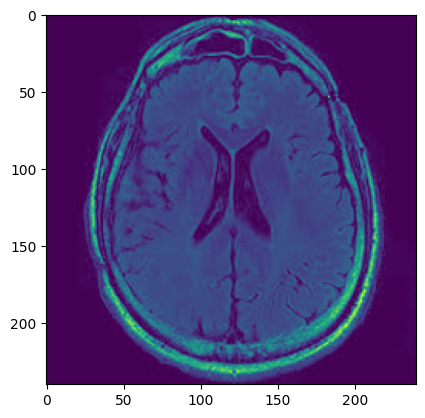

Predicted Value is: no Tumor 


In [53]:
import random
for i in range(1, 10):
    n = random.randint(0,50)
    plt.imshow(np.squeeze(X_test[n]))
    plt.show()
#   predicted_value = model.predict(X_test)
    predicted_value = y_predicted_tf[n]
#   g = np.argmax(predicted_value[n])
    if(predicted_value == 1):
        print(f'Predicted Value is: tumor ')
    else:
        print(f'Predicted Value is: no Tumor ')  


In [54]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

In [55]:
print(classification_report(y_predicted_tf,y_test))

              precision    recall  f1-score   support

           0       0.63      0.71      0.67        17
           1       0.84      0.79      0.82        34

    accuracy                           0.76        51
   macro avg       0.74      0.75      0.74        51
weighted avg       0.77      0.76      0.77        51

